In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
amzn = pd.read_csv('./data/AMZN_historical_data.csv', parse_dates=['Date'])
nvda = pd.read_csv('./data/NVDA_historical_data.csv', parse_dates=['Date'])
tsla = pd.read_csv('./data/TSLA_historical_data.csv', parse_dates=['Date'])

In [6]:
display(amzn.describe())
display(nvda.describe())
display(tsla.describe())

,Date,Open,High,Low,Close,Volume
count,7014,7014.000000,7014.000000,7014.000000,7014.000000,7.014000e+03
mean,2011-04-22 08:09:51.274593792,41.301531,41.792163,40.783837,41.310847,1.357053e+08
min,1997-05-15 00:00:00,0.069792,0.072396,0.065625,0.070313,9.744000e+06
25%,2004-05-05 06:00:00,2.115625,2.150875,2.073000,2.106938,6.271932e+07
50%,2011-04-20 12:00:00,9.113000,9.218000,8.976000,9.099000,1.002350e+08
75%,2018-04-10 18:00:00,75.497124,76.791874,74.343748,75.820623,1.551930e+08
max,2025-04-01 00:00:00,242.059998,242.520004,238.029999,239.020004,2.086584e+09
std,NaN,58.856379,59.535823,58.148262,58.880305,1.374255e+08


,Date,Open,High,Low,Close,Volume
count,6589,6589.000000,6589.000000,6589.000000,6589.000000,6.589000e+03
mean,2012-02-24 20:07:14.906662656,9.289260,9.464693,9.102549,9.294567,5.976172e+08
min,1999-01-22 00:00:00,0.031283,0.032597,0.030566,0.032000,1.968000e+07
25%,2005-08-10 00:00:00,0.258823,0.265548,0.251029,0.257966,3.366840e+08
50%,2012-02-24 00:00:00,0.438632,0.444539,0.431907,0.438861,4.986480e+08
75%,2018-09-11 00:00:00,4.720416,4.785940,4.664060,4.730228,7.294960e+08
max,2025-04-01 00:00:00,149.416245,153.115916,147.806407,153.015919,9.230856e+09
std,NaN,25.034413,25.523619,24.528536,25.075158,4.302890e+08


,Date,Open,High,Low,Close,Volume
count,3713,3713.000000,3713.000000,3713.000000,3713.000000,3.713000e+03
mean,2017-11-11 17:11:37.118233088,85.643493,87.576508,83.641004,85.687666,9.667553e+07
min,2010-06-29 00:00:00,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,2014-03-07 00:00:00,12.301333,12.568000,12.066667,12.282667,4.958700e+07
50%,2017-11-09 00:00:00,18.492666,18.760000,18.220667,18.506666,8.243970e+07
75%,2021-07-21 00:00:00,184.860001,188.500000,180.630005,184.990005,1.222761e+08
max,2025-04-01 00:00:00,479.859985,488.540009,457.510010,475.899994,9.140820e+08
std,NaN,111.708980,114.344809,109.031796,111.836766,7.720624e+07


In [7]:
def create_graphic(df: pd.DataFrame) -> None:
    # Crear gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Open'], label="Precio de la acción", color="blue", linewidth=2)
    plt.xlabel("Fecha")
    plt.ylabel("Precio ($)")
    plt.title("Evolución Histórica del Precio de una Acción")
    plt.legend()
    plt.grid(True)
    plt.show()

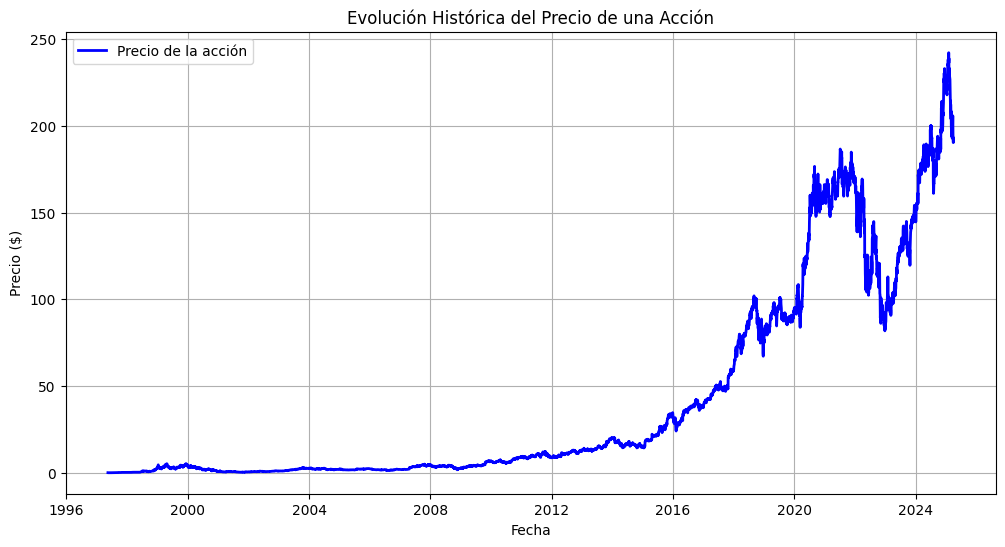

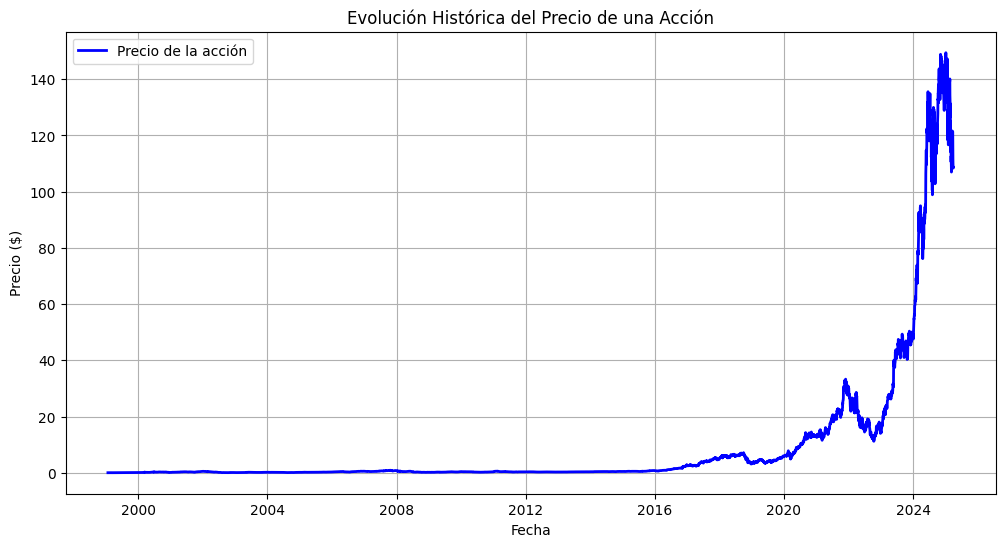

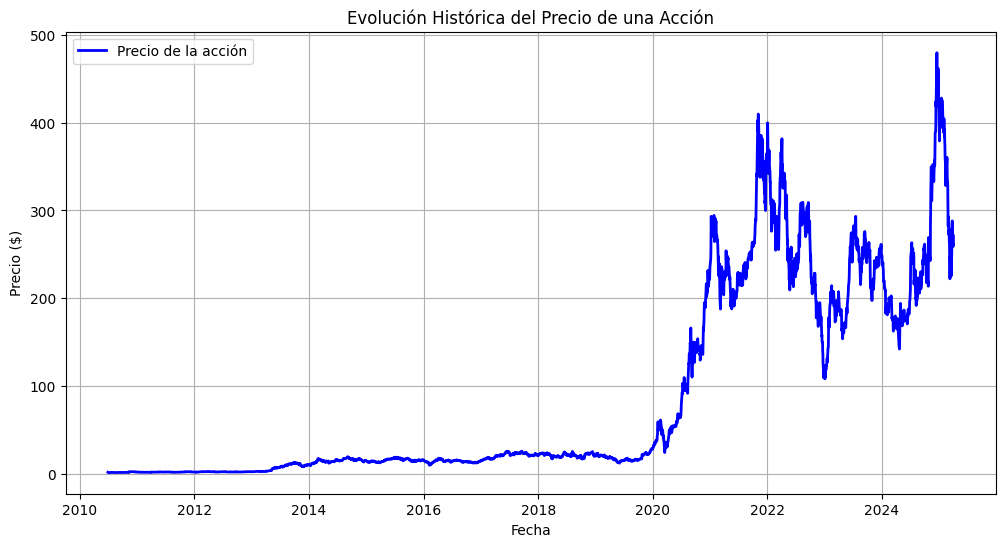

In [8]:
create_graphic(amzn)
create_graphic(nvda)
create_graphic(tsla)

In [9]:
def decomposition(df: pd.DataFrame) -> None:
    # Descomposición de la serie temporal
    decomposition = seasonal_decompose(df["Open"], model="additive", period=12)

    # Graficar la descomposición
    fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
    decomposition.trend.plot(ax=axes[0], color="blue", title="Tendencia")
    decomposition.seasonal.plot(ax=axes[1], color="green", title="Estacionalidad")
    decomposition.resid.plot(ax=axes[2], color="red", title="Residuo")

    plt.xlabel("Fecha")
    plt.tight_layout()
    plt.show()

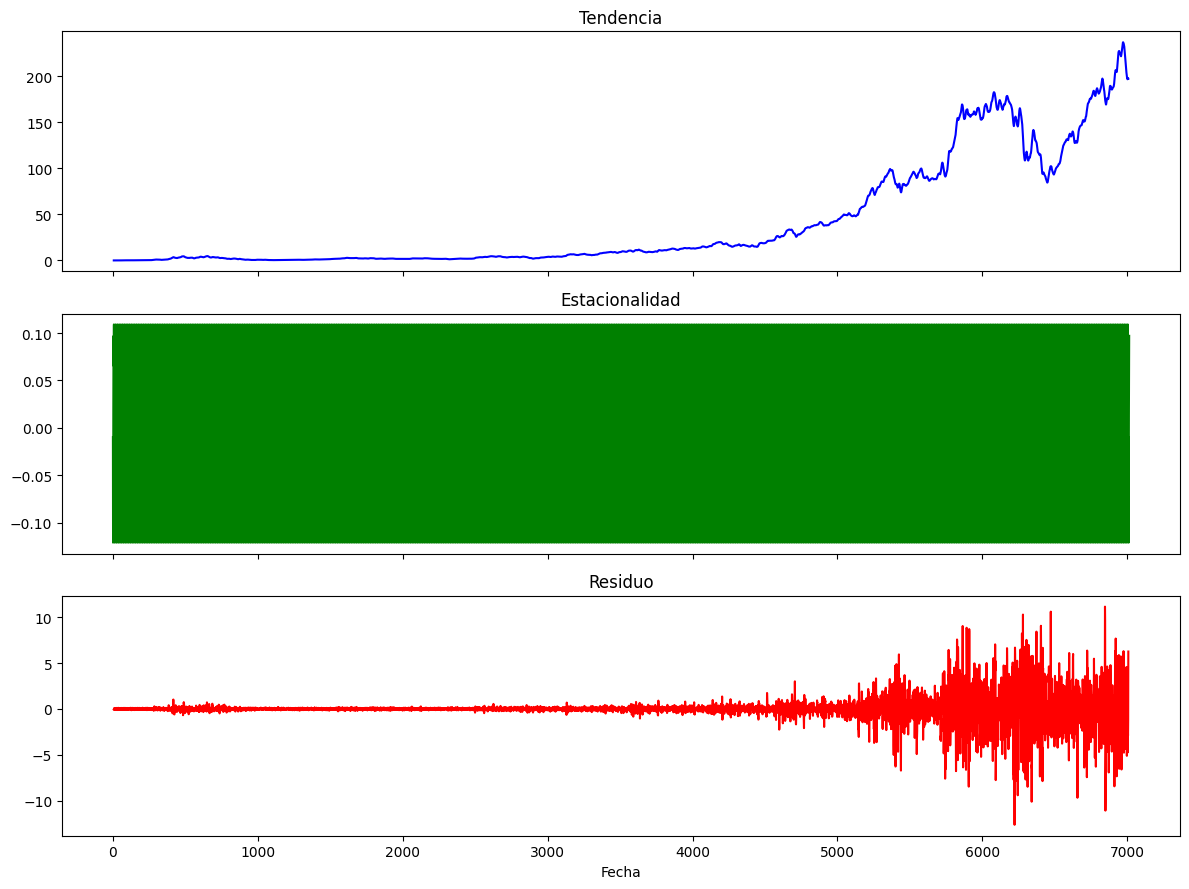

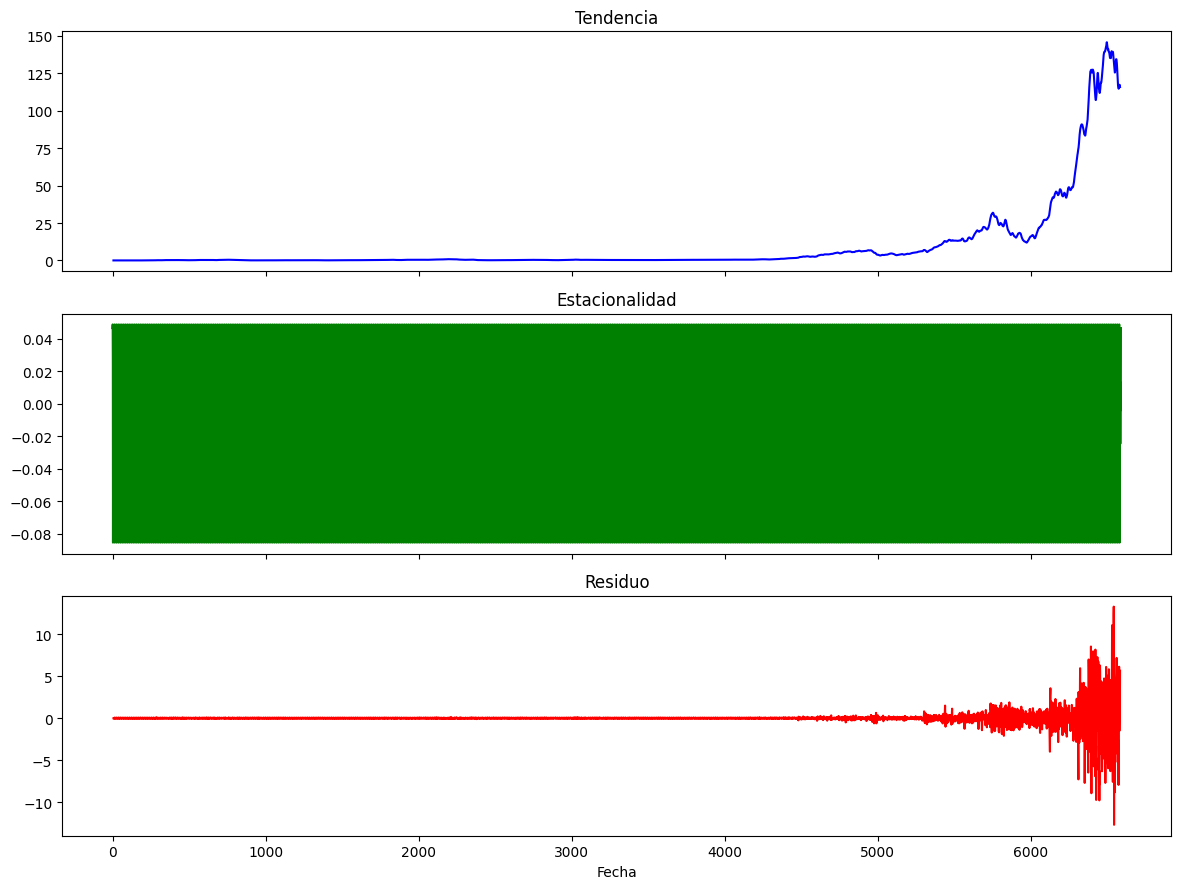

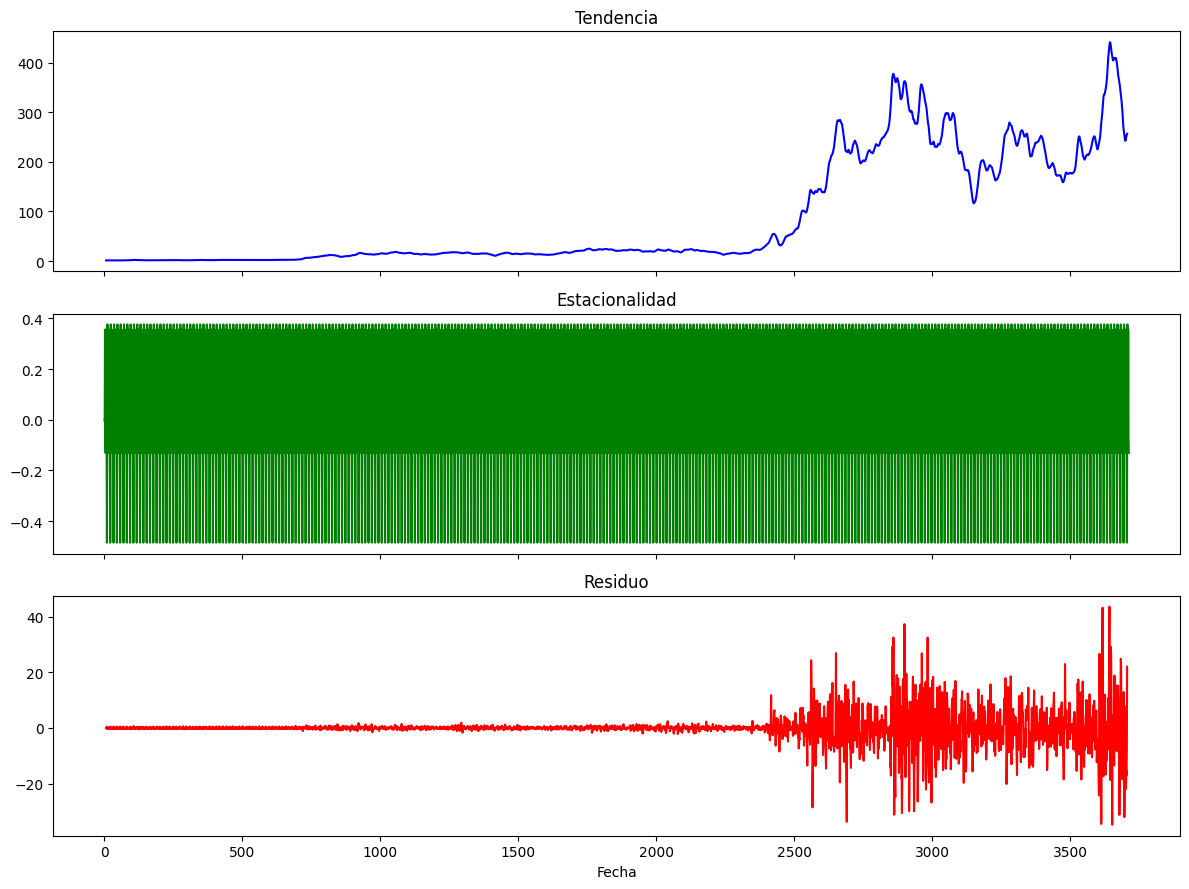

In [10]:
decomposition(amzn)
decomposition(nvda)
decomposition(tsla)

In [11]:
def autocorrelation_plot(df: pd.DataFrame, lags=40) -> None:
    # Graficar la autocorrelación
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_acf(df["Open"], lags=lags, ax=ax)
    plt.title("Autocorrelación")
    plt.xlabel("Lags")
    plt.ylabel("Autocorrelación")
    plt.show()

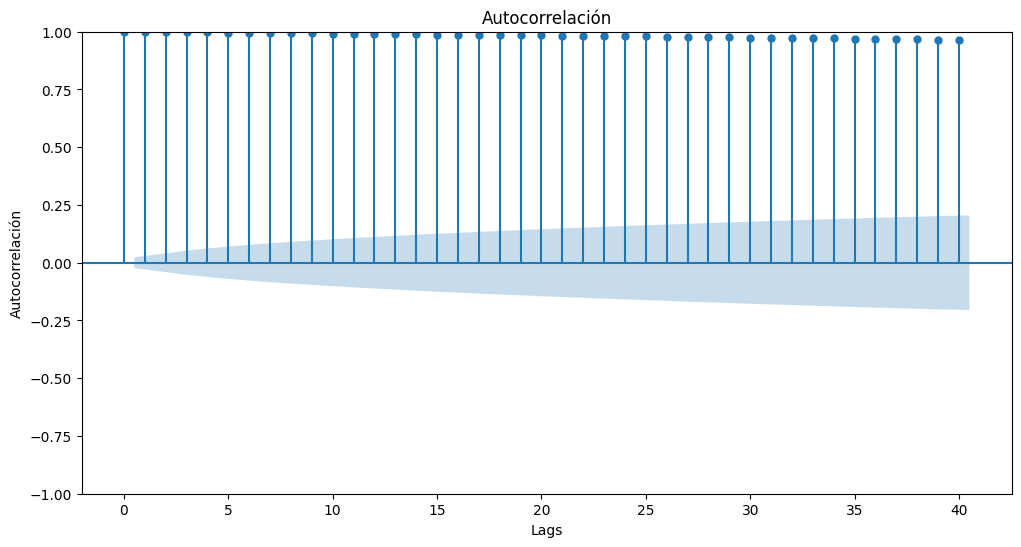

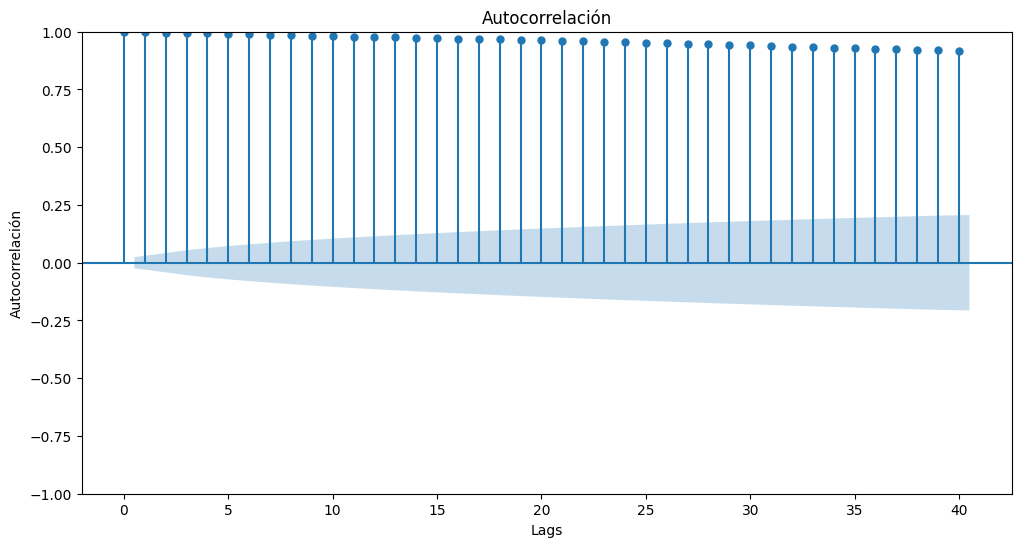

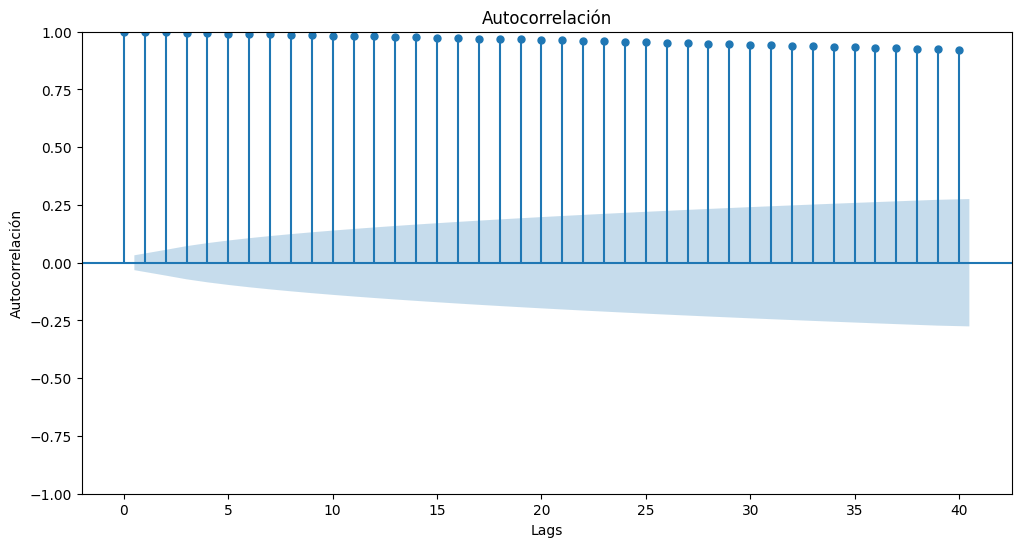

In [12]:
autocorrelation_plot(amzn)
autocorrelation_plot(nvda)
autocorrelation_plot(tsla)

In [13]:
def outliers_detection(df: pd.DataFrame) -> None:
    # Detección de Outliers con IQR
    q1, q3 = df["Open"].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outliers = (df["Open"] < lower_bound) | (df["Open"] > upper_bound)

    # Graficar con outliers marcados
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df["Open"], label="Precio de la acción", color="blue", linewidth=2)
    plt.scatter(df.index[outliers], df["Open"][outliers], color="red", label="Outliers", zorder=3)
    plt.xlabel("Fecha")
    plt.ylabel("Precio ($)")
    plt.title("Detección de Outliers en el Precio de la Acción")
    plt.legend()
    plt.grid(True)
    plt.show()

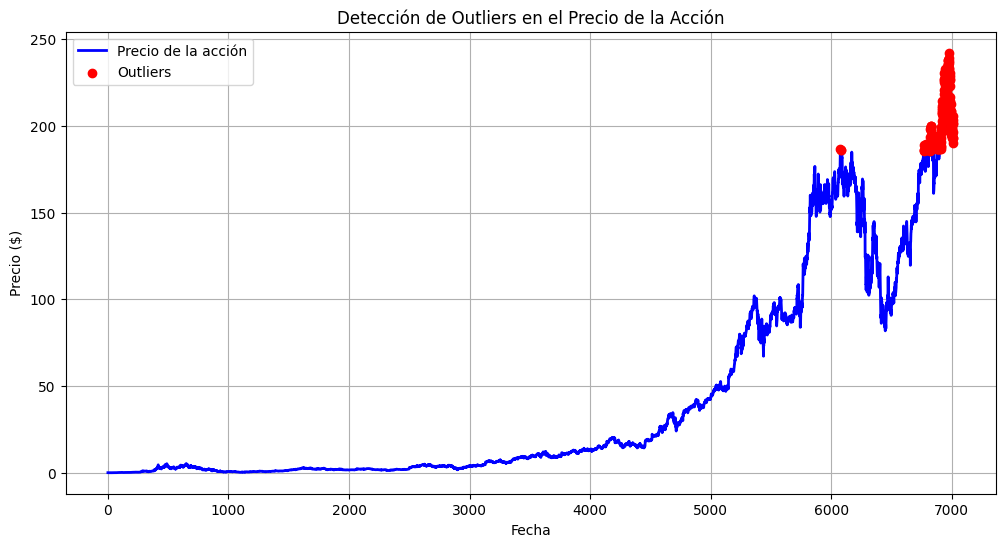

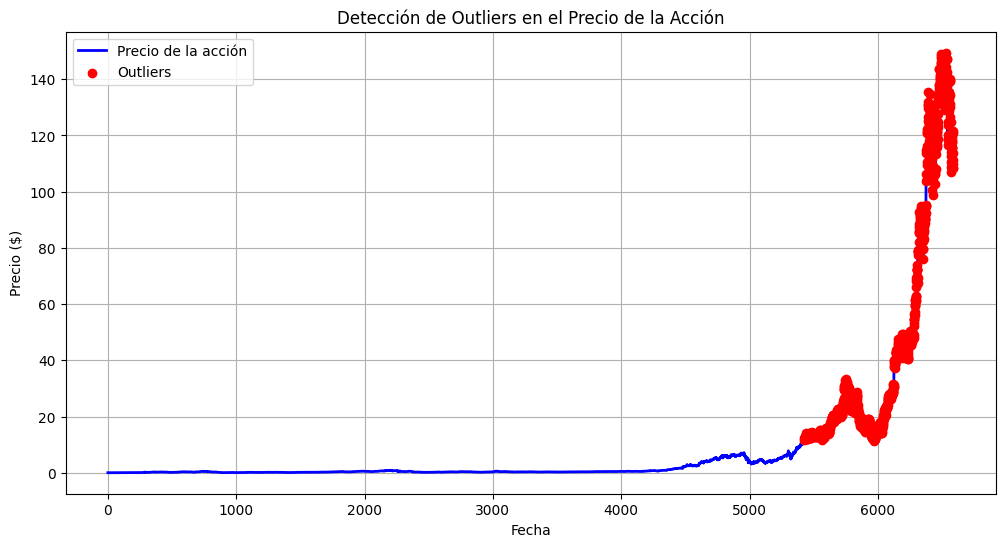

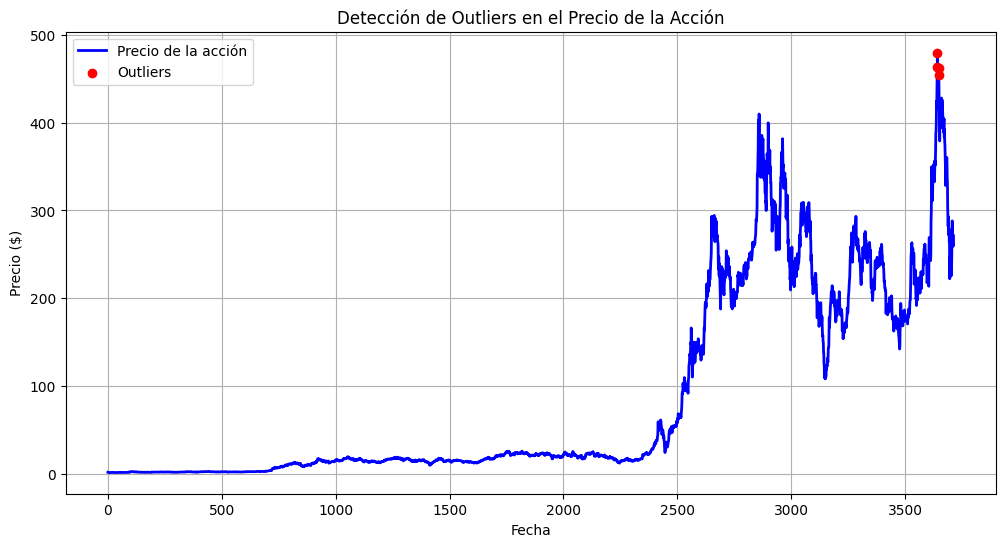

In [14]:
outliers_detection(amzn)
outliers_detection(nvda)
outliers_detection(tsla)